## check

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filepath="train.csv"
df=pd.read_csv(filepath)
df.shape

(592380, 28)

In [5]:
target=df['y']

In [6]:
df=df.iloc[:,1:27]

df.shape

(592380, 26)

In [7]:
df.head()


,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid1vol,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol
0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,3841.0,...,8,1,6,14,6,6,1,1,10,2
1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,3842.0,...,7,6,11,1,6,1,4,4,1,13
2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,3843.0,...,3,1,4,21,12,1,16,10,4,9
3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,3842.0,...,10,13,12,2,4,2,7,1,2,11
4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,3841.8,...,14,12,2,2,4,1,3,1,11,15


## Liquidity indictor


In [10]:
df.mean()

last_price              3965.639532
mid                     3965.639078
opened_position_qty        1.400583
closed_position_qty        1.964277
transacted_qty             2.390106
d_open_interest           -0.080745
bid1                    3965.446863
bid2                    3965.209031
bid3                    3964.985168
bid4                    3964.763521
bid5                    3964.542642
ask1                    3965.831294
ask2                    3966.069980
ask3                    3966.295365
ask4                    3966.518326
ask5                    3966.740443
bid1vol                    3.831917
bid2vol                    4.906759
bid3vol                    5.314979
bid4vol                    5.601242
bid5vol                    5.930859
ask1vol                    3.887878
ask2vol                    4.913441
ask3vol                    5.309274
ask4vol                    5.611319
ask5vol                    5.927790
dtype: float64

### for liquidity indicator we use the best bid price v/s best ask price that is calculate spread for highest bid and lowest ask 
### from mean we can get a good idea as for bid 1 is highest and ask 1 is lowest

In [13]:
df['Spread']=df['bid1']-df['ask1']

In [14]:
df

,last_price,mid,opened_position_qty,closed_position_qty,transacted_qty,d_open_interest,bid1,bid2,bid3,bid4,...,bid2vol,bid3vol,bid4vol,bid5vol,ask1vol,ask2vol,ask3vol,ask4vol,ask5vol,Spread
0,3842.4,3842.6,NaN,NaN,103.0,0,3842.4,3842.0,3841.8,3841.0,...,1,6,14,6,6,1,1,10,2,-0.4
1,3842.8,3843.4,6.0,49.0,55.0,-43,3843.0,3842.8,3842.4,3842.0,...,6,11,1,6,1,4,4,1,13,-0.8
2,3844.0,3844.3,7.0,77.0,84.0,-69,3843.8,3843.6,3843.2,3843.0,...,1,4,21,12,1,16,10,4,9,-1.0
3,3843.8,3843.4,3.0,34.0,37.0,-30,3843.0,3842.8,3842.4,3842.0,...,13,12,2,4,2,7,1,2,11,-0.8
4,3843.2,3843.1,3.0,38.0,41.0,-35,3842.8,3842.4,3842.0,3841.8,...,12,2,2,4,1,3,1,11,15,-0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592375,4110.2,4110.3,1.0,1.0,2.0,1,4110.2,4110.0,4109.4,4109.2,...,2,1,3,2,2,3,10,7,7,-0.2
592376,4109.4,4110.5,6.0,5.0,11.0,1,4109.2,4109.0,4108.6,4108.2,...,2,2,6,5,3,9,7,7,5,-2.6
592377,4109.4,4110.5,NaN,NaN,0.0,0,4109.2,4109.0,4108.6,4108.2,...,2,2,6,5,3,9,7,7,5,-2.6
592378,4109.4,4110.5,NaN,NaN,0.0,0,4109.2,4109.0,4108.6,4108.2,...,2,2,6,5,3,9,7,7,5,-2.6


In [15]:
import tqdm


## Hexabin plots

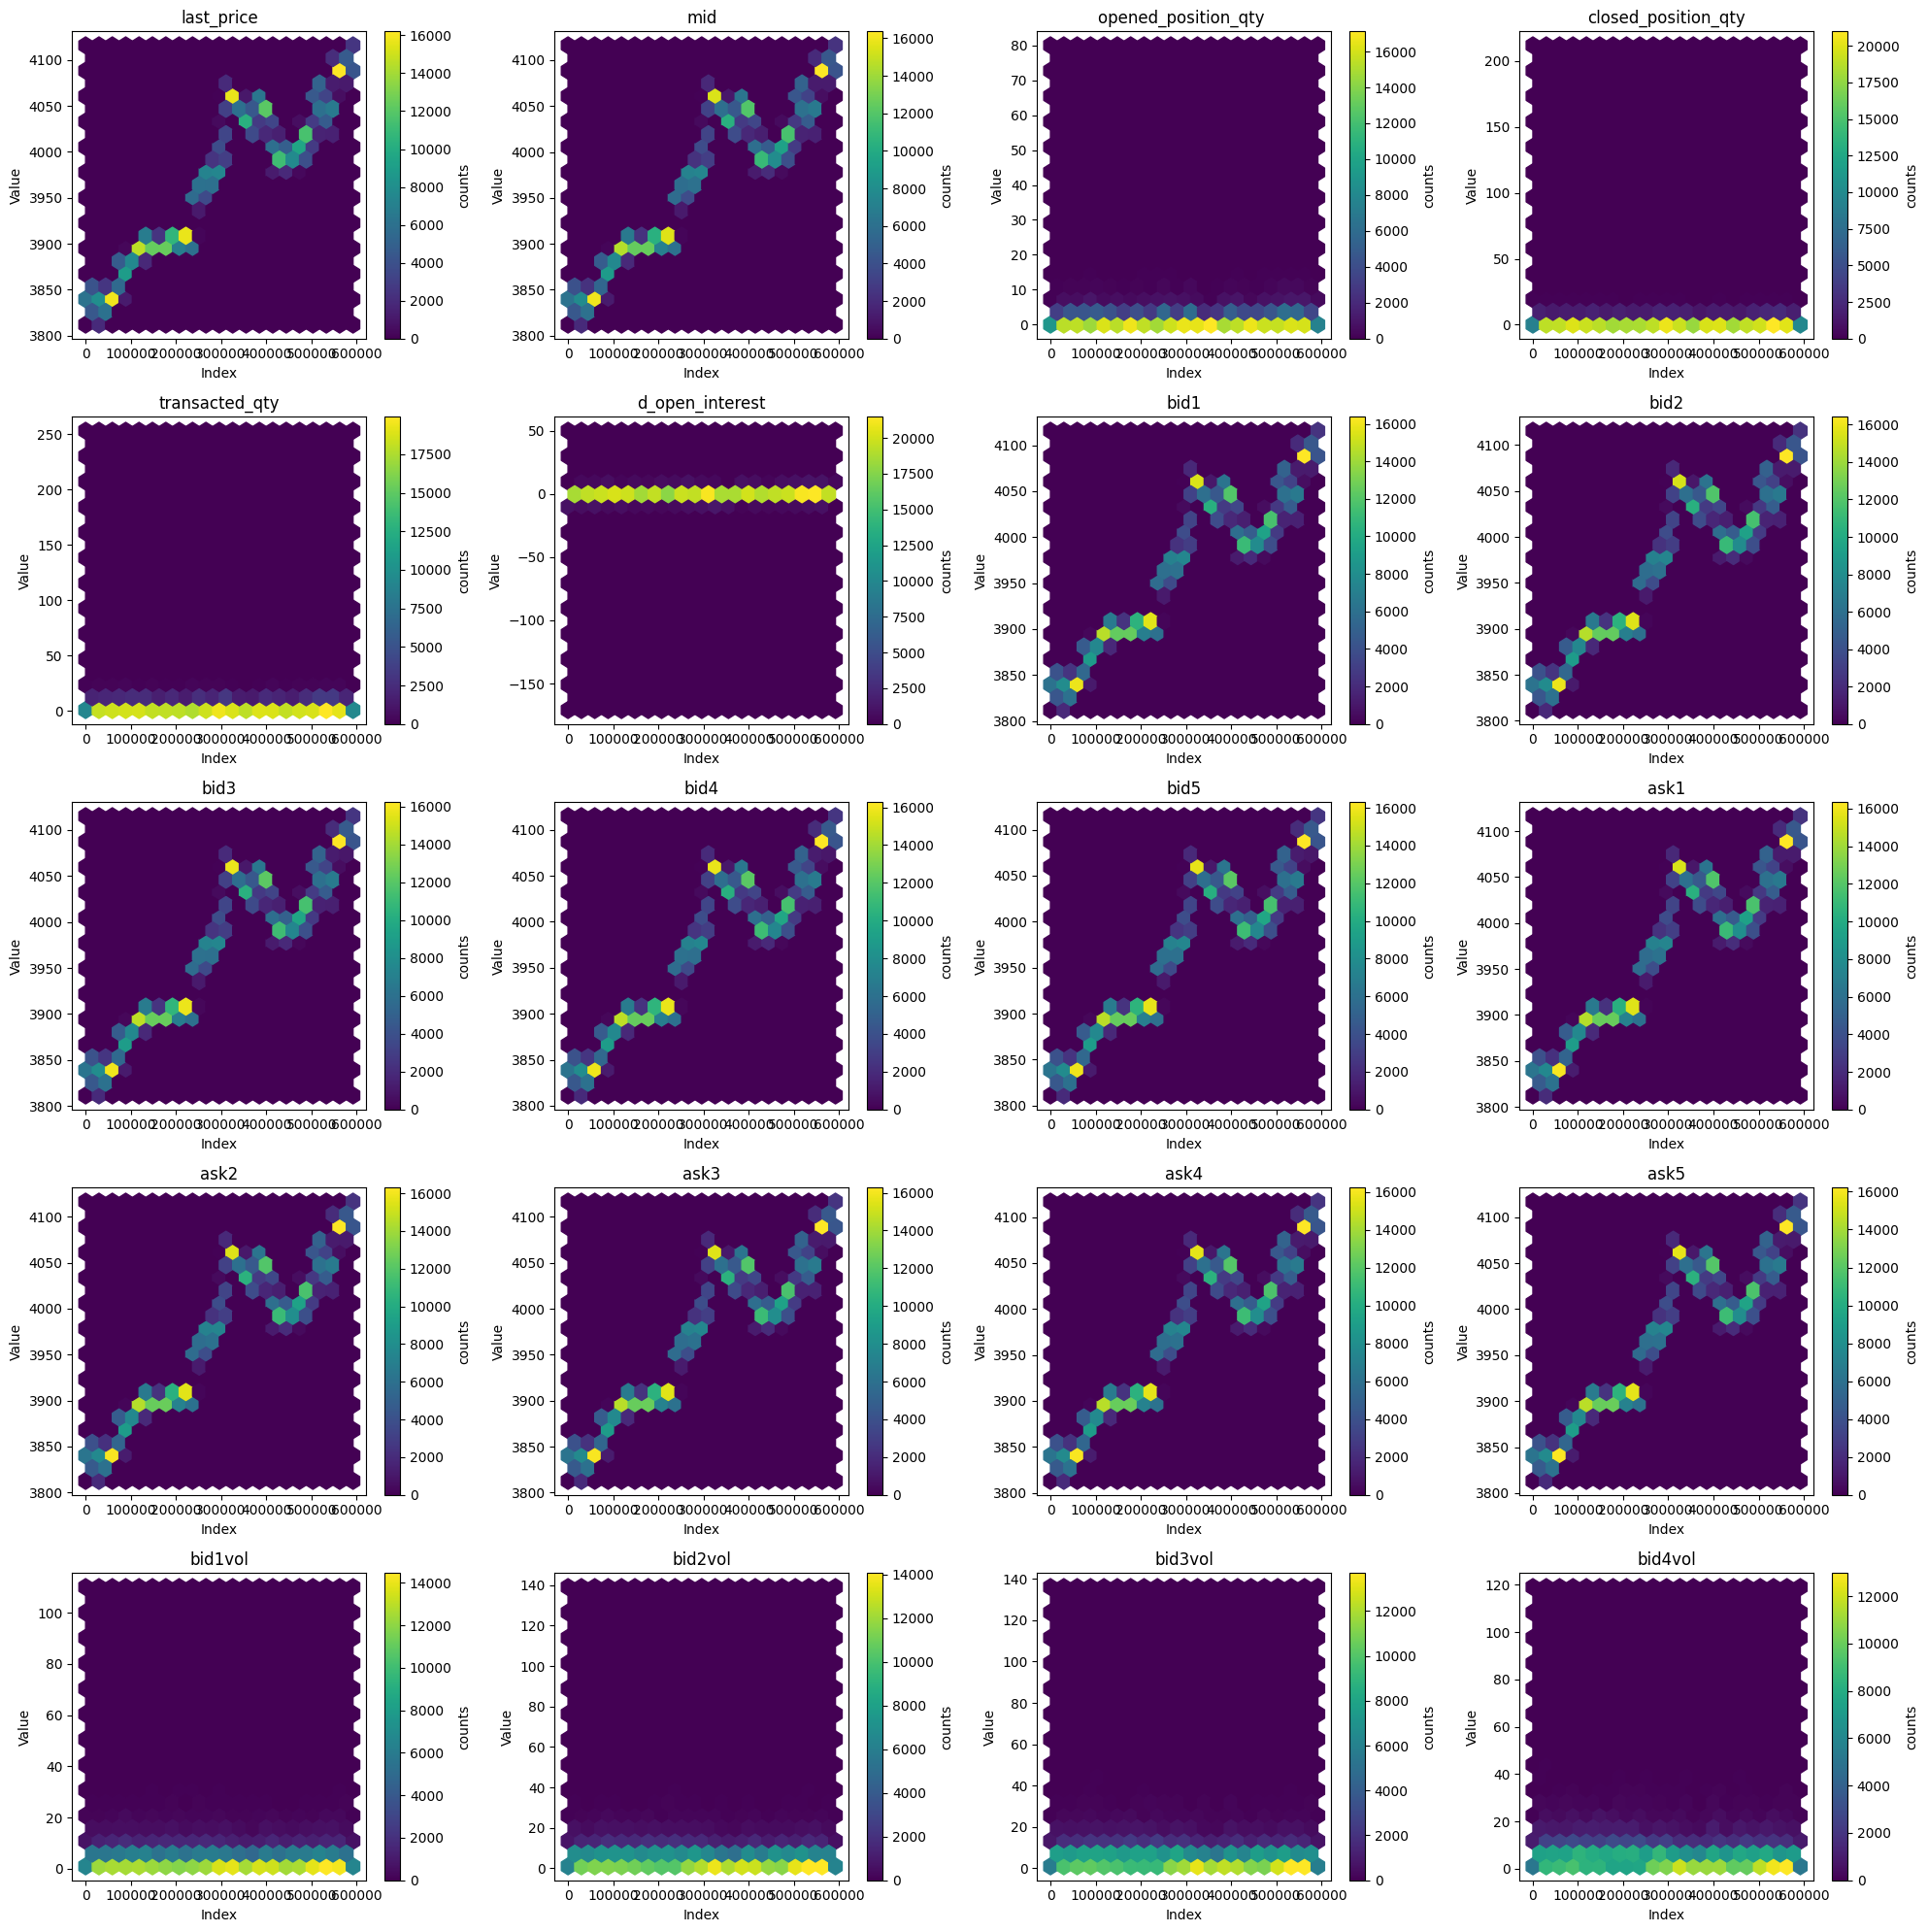

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))
for i, ax in enumerate(axes.flatten()):
    if i < df.shape[1]:
        feature = df.columns[i]
        hb=ax.hexbin(df.index, df[feature], gridsize=20, cmap='viridis')
        ax.set_title(feature)
        ax.set_xlabel('Index')
        ax.set_ylabel('Value')
        cb = fig.colorbar(hb, ax=ax, label='counts')
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()

## Density contour plots

<ipython-input-16-6990e6734840>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[feature], ax=ax, shade=True, cmap='viridis', cbar=True)
<ipython-input-16-6990e6734840>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[feature], ax=ax, shade=True, cmap='viridis', cbar=True)
<ipython-input-16-6990e6734840>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[feature], ax=ax, shade=True, cmap='viridis', cbar=True)
<ipython-input-16-6990e6734840>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  

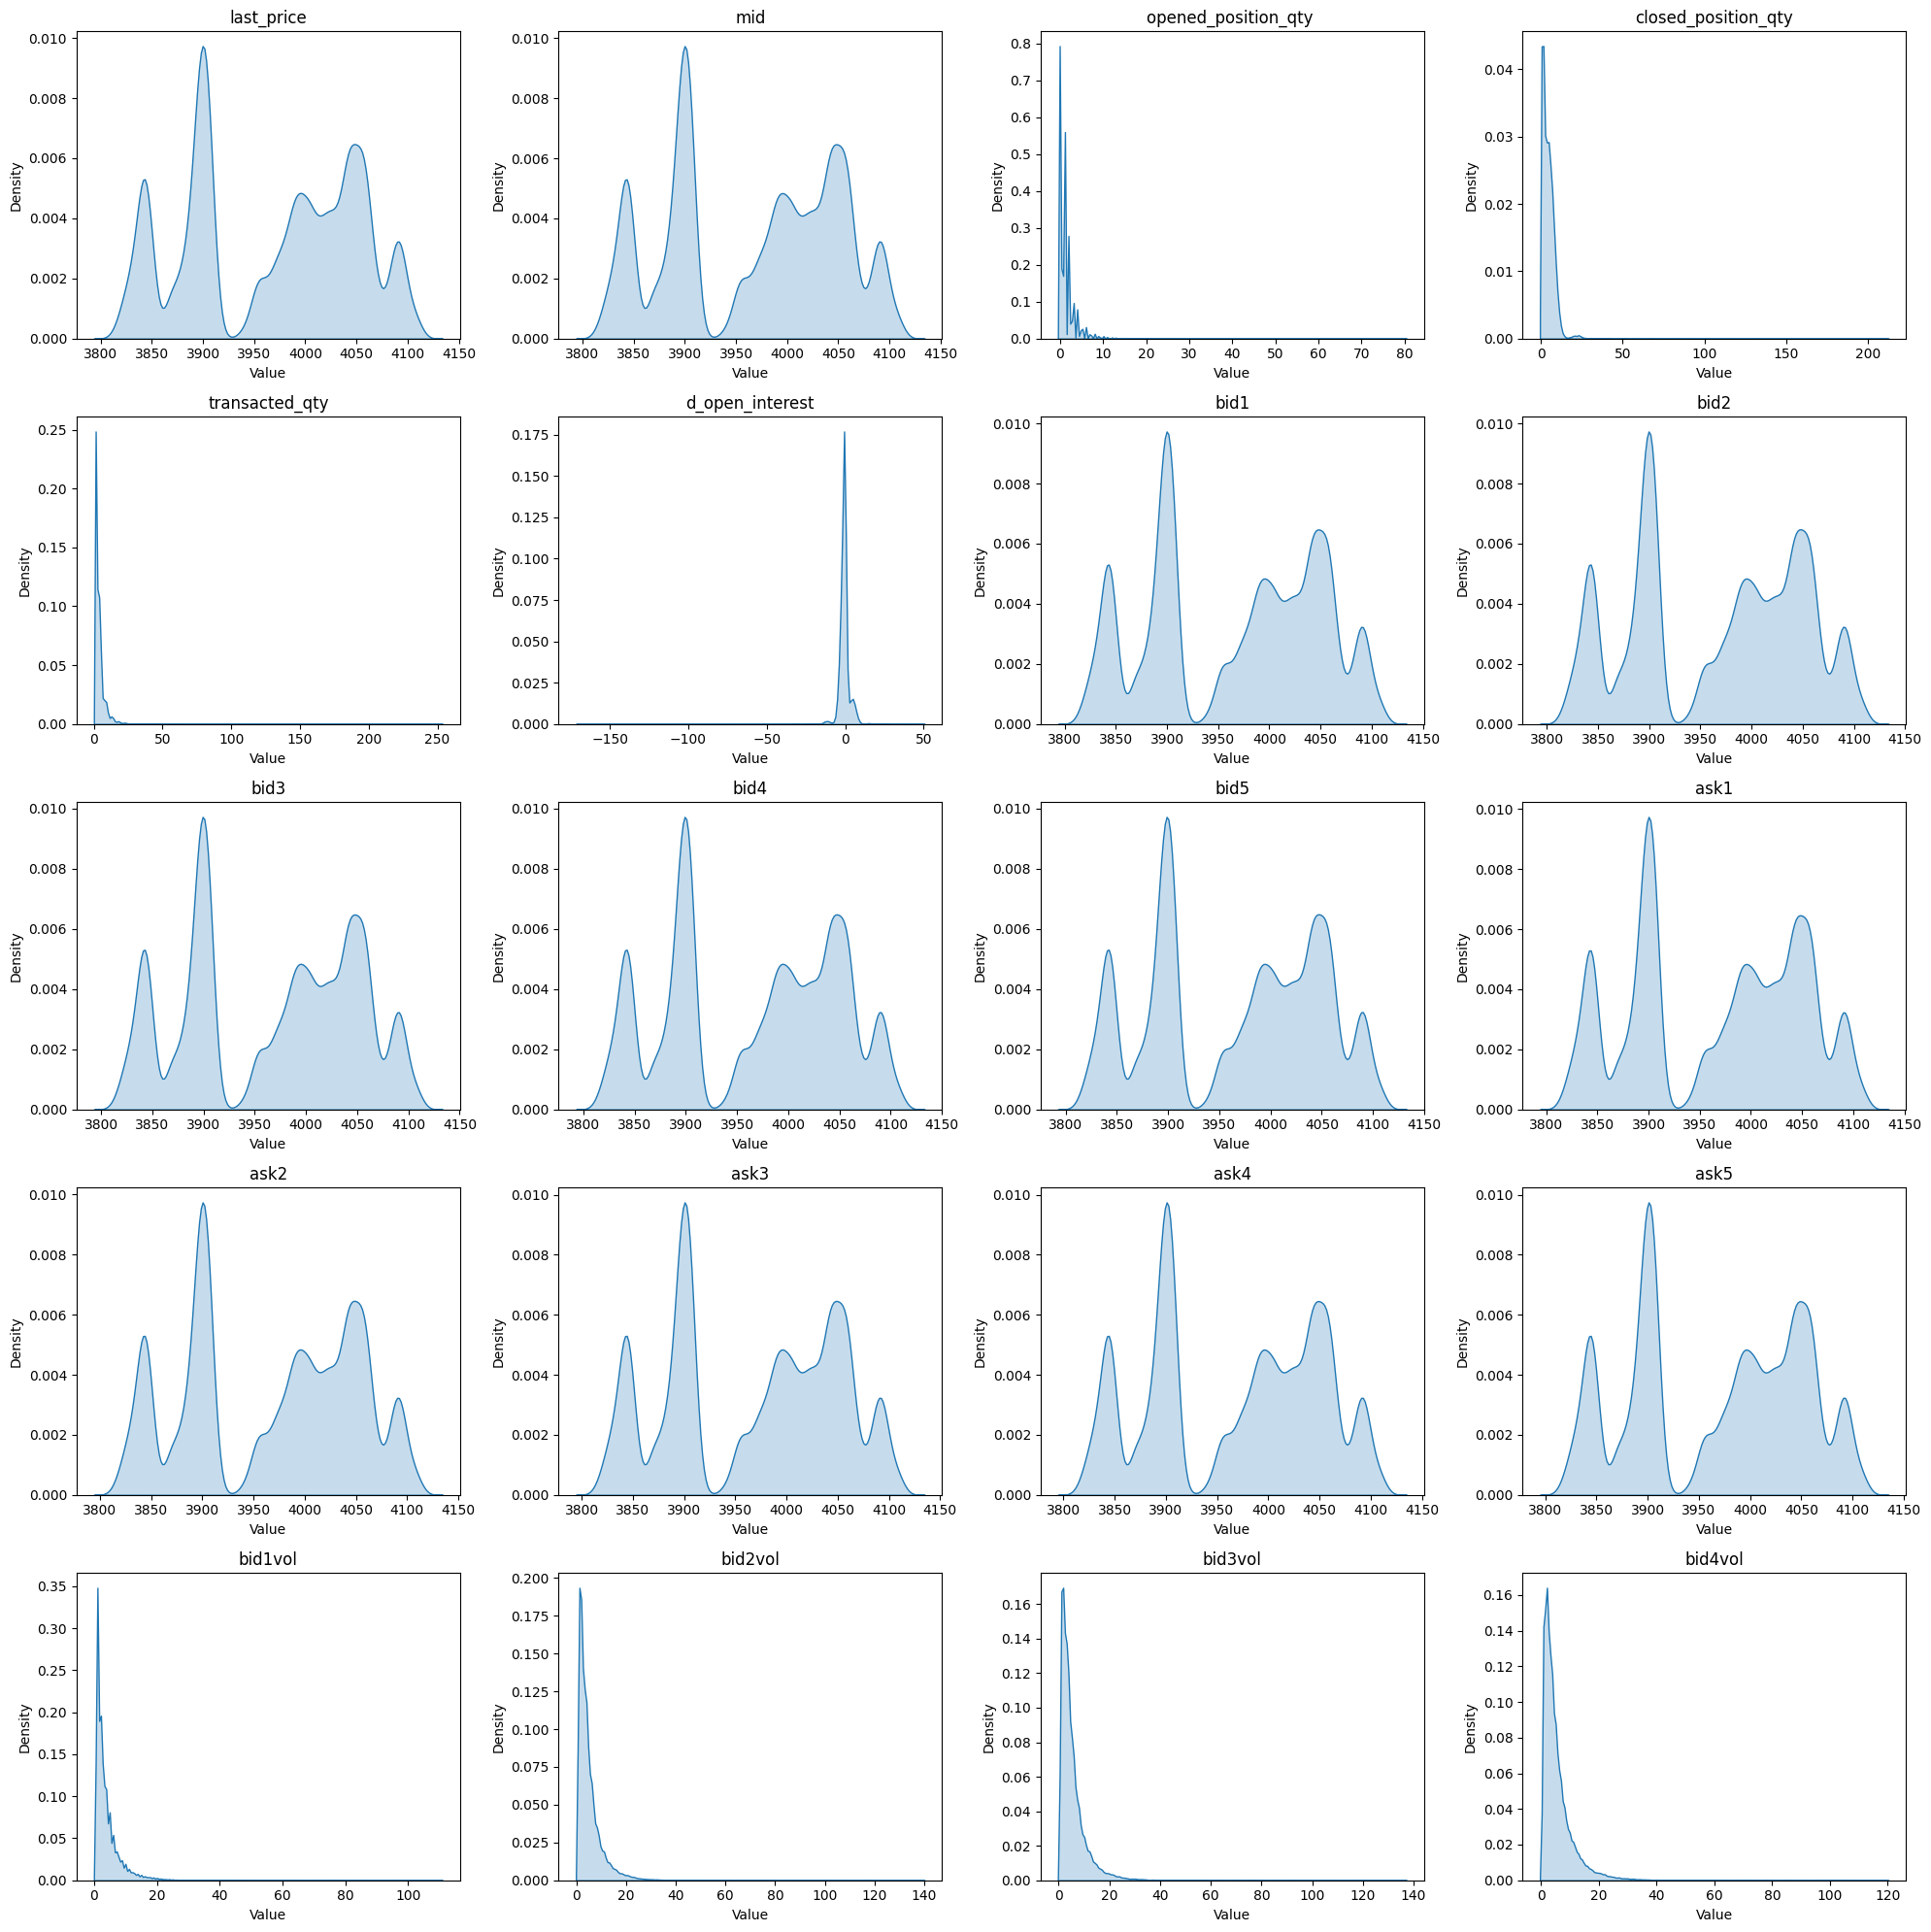

In [ ]:
fig, axes = plt.subplots(5, 4, figsize=(20, 20))

for i, ax in enumerate(axes.flatten()):
    if i < df.shape[1]:  # Ensure we don't try to plot more features than available
        feature = df.columns[i]
        sns.kdeplot(data=df[feature], ax=ax, shade=True, cmap='viridis', cbar=True)
        ax.set_title(feature)
        ax.set_xlabel('Value')
        ax.set_ylabel('Density')
    else:
        ax.axis('off')  # If there are fewer than 20 features, hide extra subplots

plt.tight_layout()
plt.show()

## Heatmaps

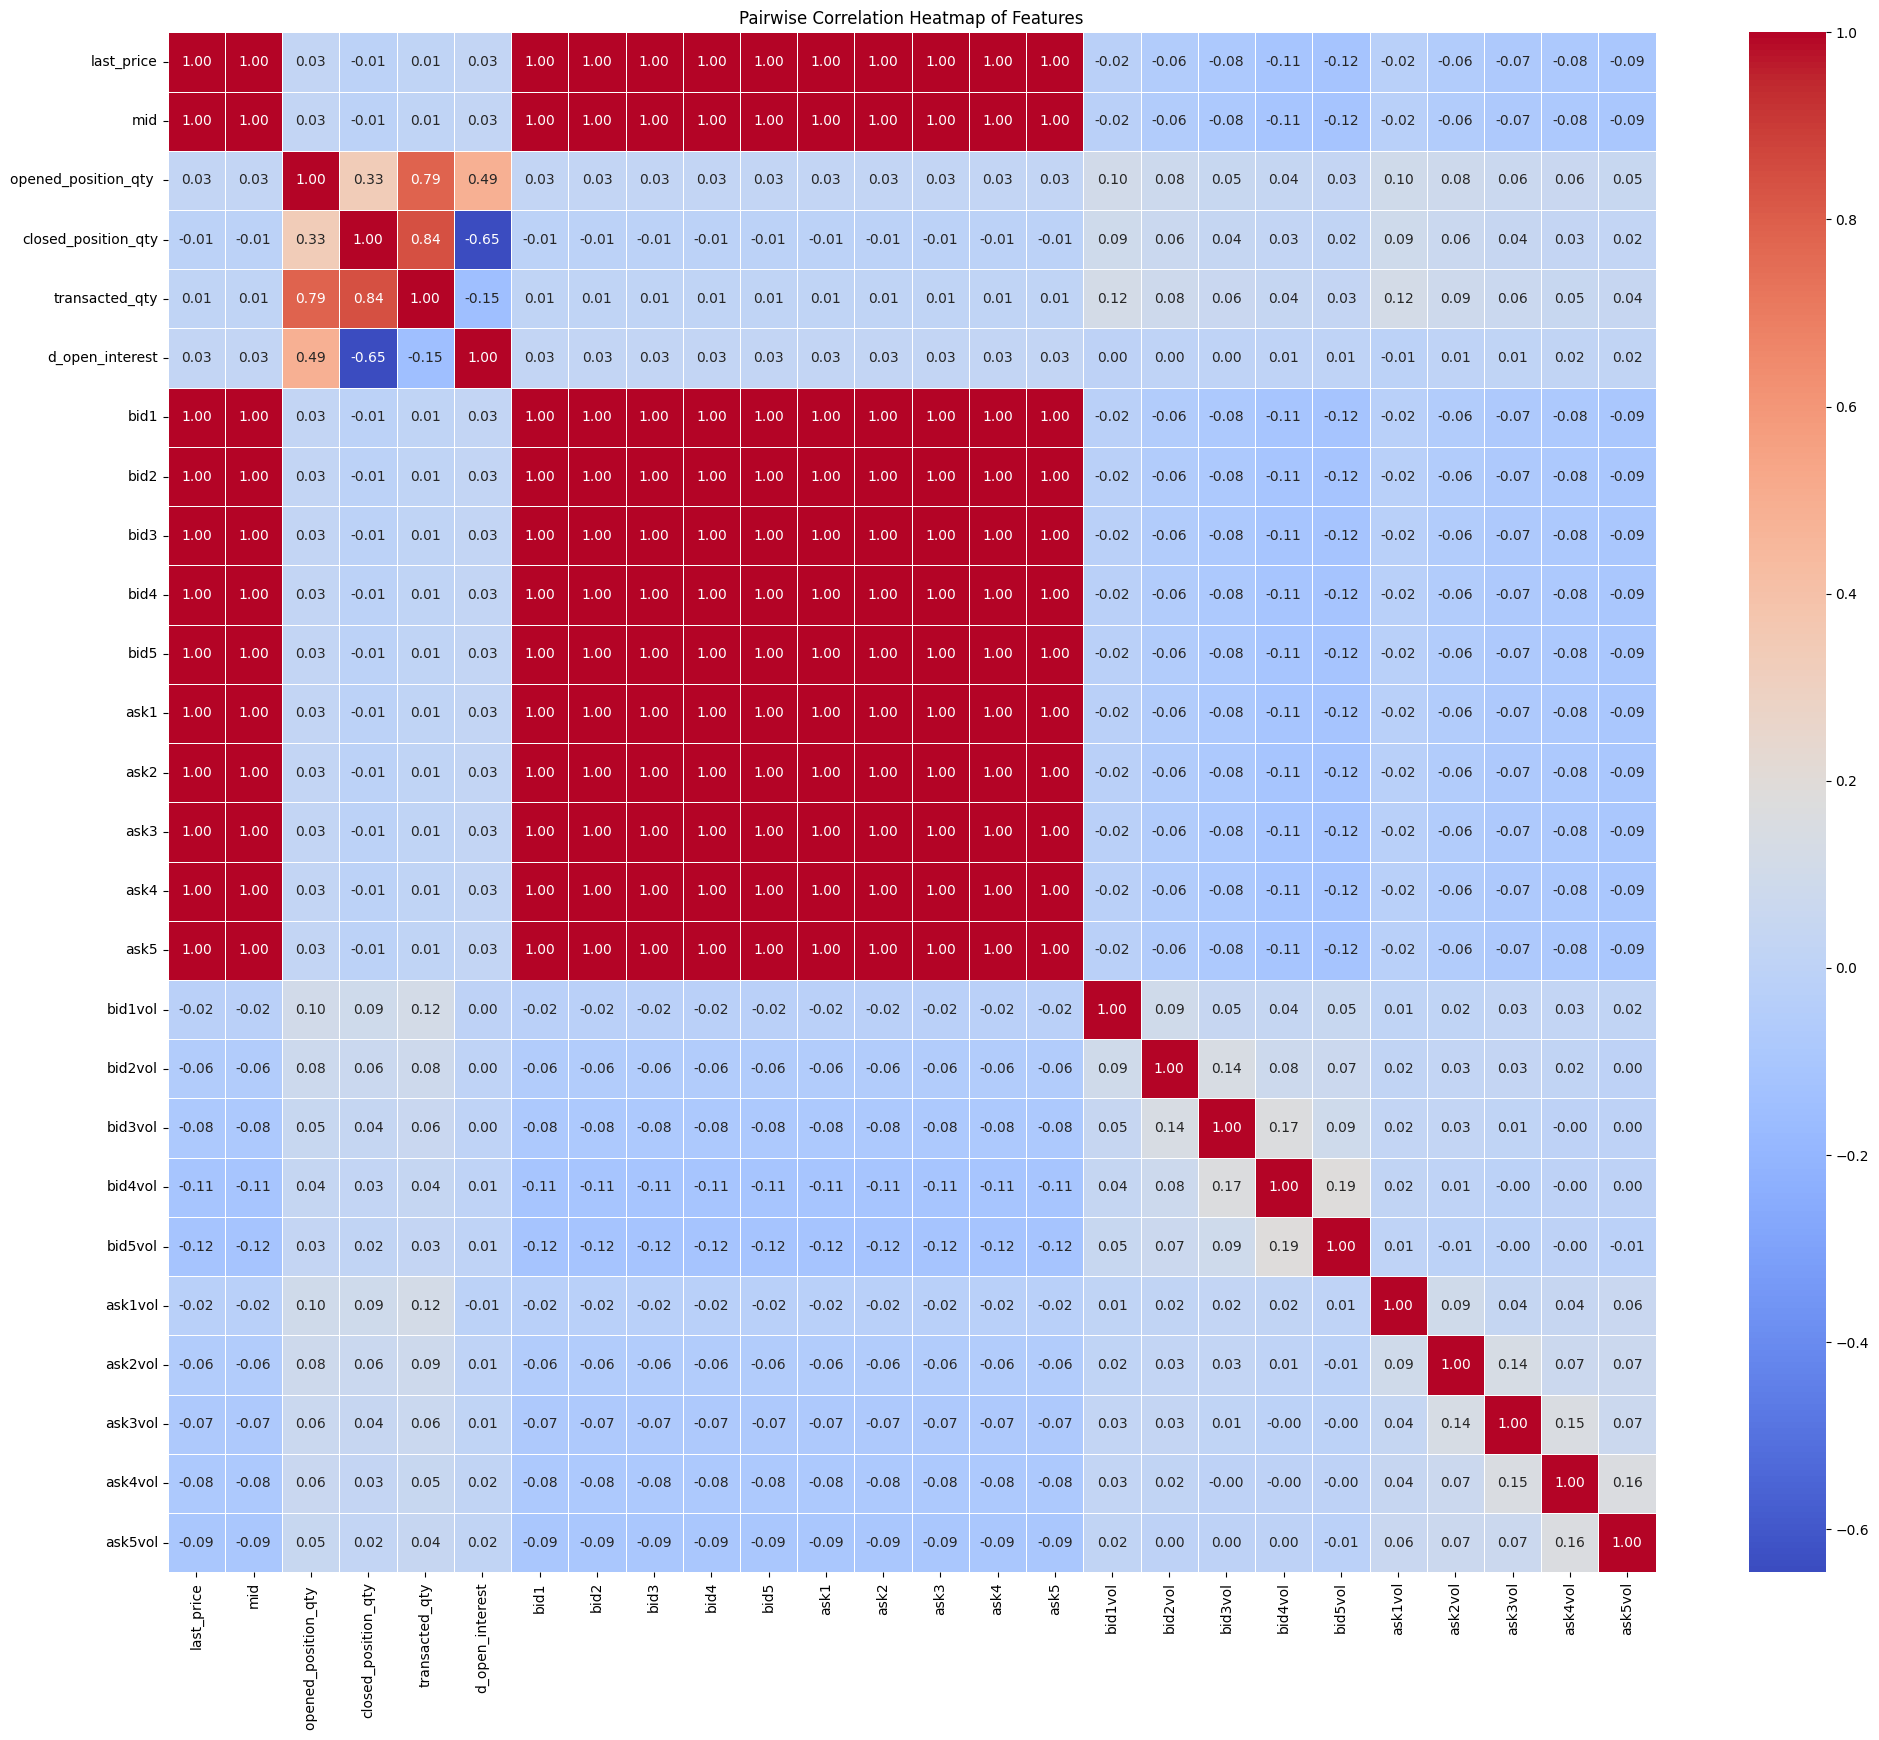

In [ ]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Pairwise Correlation Heatmap of Features')
plt.show()

## voilin plots

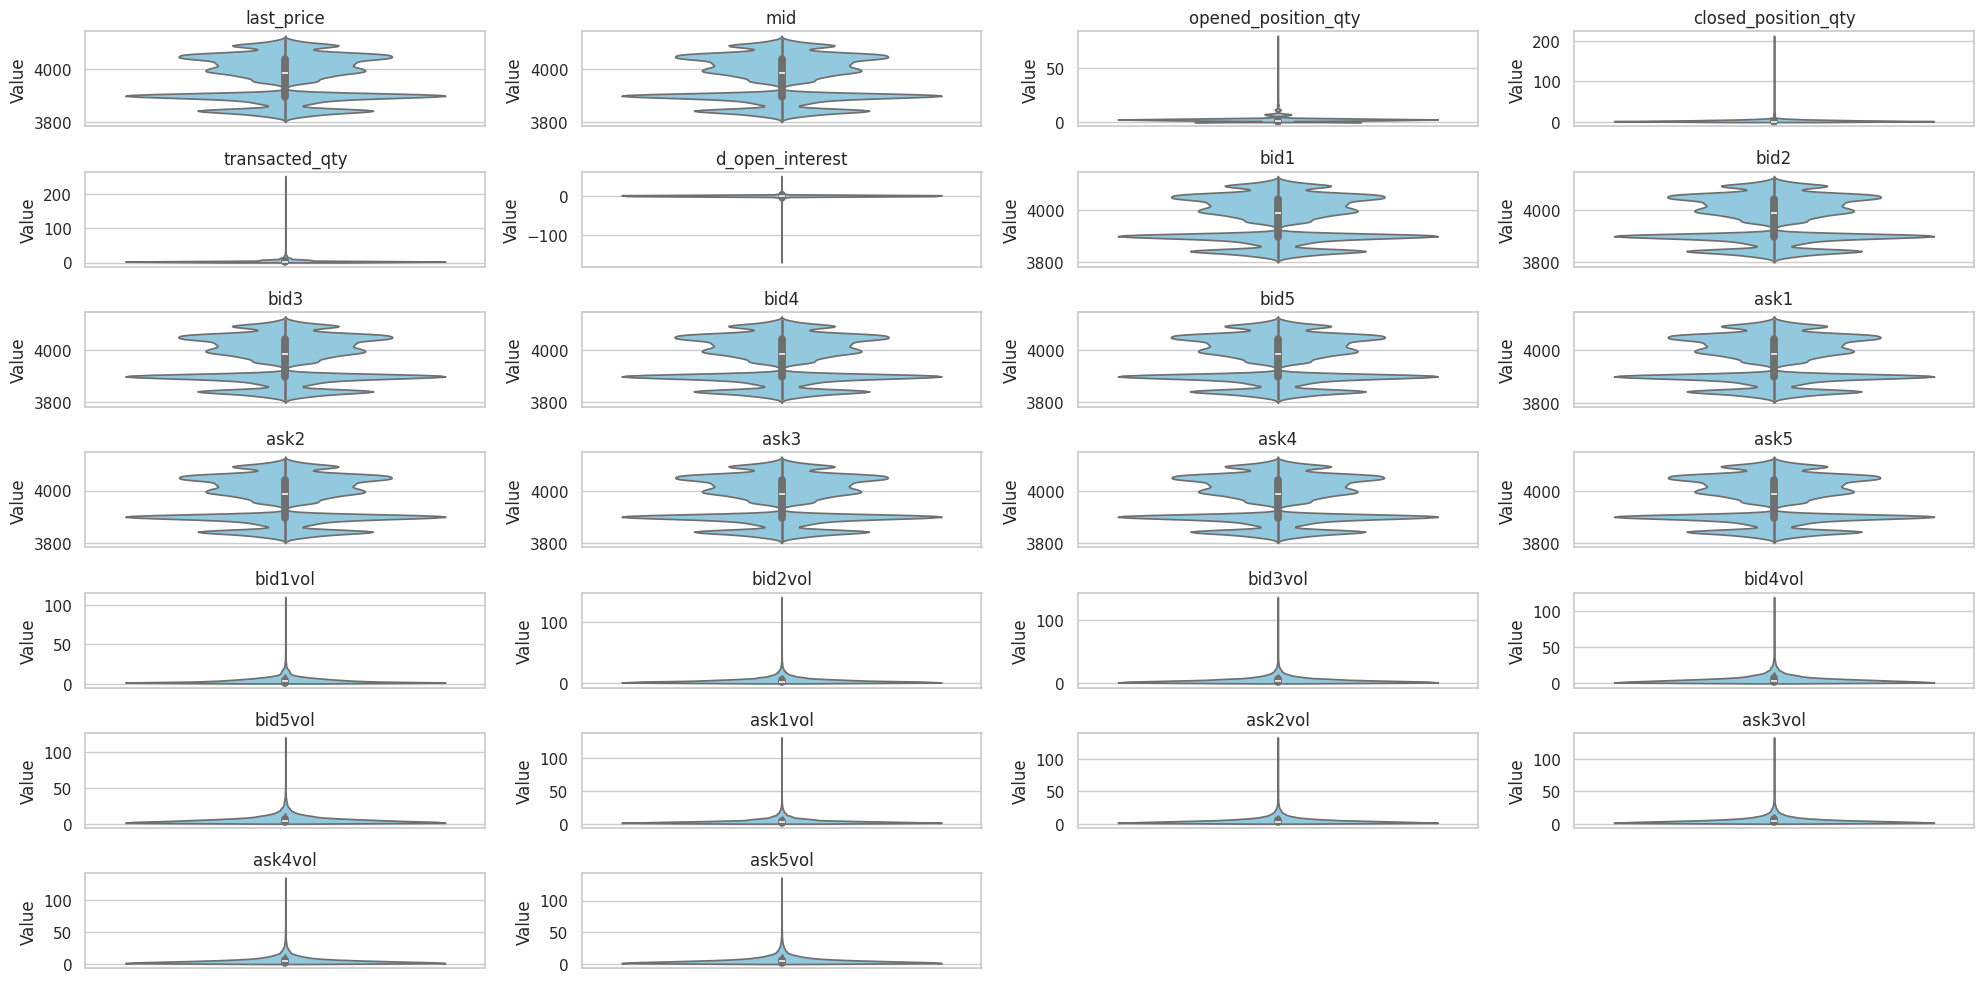

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(style="whitegrid")

for i in range(df.shape[1]):
    plt.subplot(7, 4, i+1)  # Adjust the subplot layout according to the number of features
    sns.violinplot(y=df.iloc[:, i], color='skyblue')
    plt.title(df.columns[i])
    plt.ylabel('Value')

plt.tight_layout()
plt.show()